In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from gekko import GEKKO

pd.set_option('display.max_columns', None)

import seaborn as sns
plt.style.use('ggplot')

import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/Users/didi/Downloads/simsun.ttc')

In [3]:
df = pd.read_csv("/Users/didi/Downloads/enjoy_model.csv",low_memory=False)
df.head()

,dt,call_city,compete_call,single,answer,finish,single_f,tsh,xt_rate
0,2020-09-01,1,504137,104627,165948,142920,62712,99090.550000,0.041185
1,2020-09-01,2,128765,25374,37343,29701,14273,41554.433333,0.535290
2,2020-09-01,3,71064,10311,21209,16921,6625,30263.000000,0.591537
3,2020-09-01,4,260976,31052,91660,75267,19379,69271.483333,0.310028
4,2020-09-01,5,116360,22456,32375,27100,13925,19229.683333,0.005614


In [4]:
df=df[(df.tsh>0)&(df.compete_call>0)]
df=df.dropna()
df['compete_call_log']=np.log(df['compete_call'])
df['tsh_log']=np.log(df['tsh'])
df['finish_rate']=df['finish']/df['compete_call']
df.head()

,dt,call_city,compete_call,single,answer,finish,single_f,tsh,xt_rate,compete_call_log,tsh_log,finish_rate
0,2020-09-01,1,504137,104627,165948,142920,62712,99090.550000,0.041185,13.130603,11.503789,0.283494
1,2020-09-01,2,128765,25374,37343,29701,14273,41554.433333,0.535290,11.765744,10.634759,0.230661
2,2020-09-01,3,71064,10311,21209,16921,6625,30263.000000,0.591537,11.171336,10.317681,0.238109
3,2020-09-01,4,260976,31052,91660,75267,19379,69271.483333,0.310028,12.472184,11.145789,0.288406
4,2020-09-01,5,116360,22456,32375,27100,13925,19229.683333,0.005614,11.664444,9.864210,0.232898


In [5]:
city_list=list(df.call_city.unique())
a1=[]
a2=[]
a3=[]
k=[]
r=[]
city_id=[]
y_head=[]
y_real=[]

for i in city_list:
    temp=df[df.call_city==i]
    #temp['z_score']=np.abs(stats.zscore(temp.compete_f_rate))
    #temp=temp[temp.z_score<=3]
    try:
        model=LinearRegression()
        x=temp[['compete_call_log','tsh_log','xt_rate']]
        y=temp['finish_rate']
        model.fit(x,y)
        a1.append(model.coef_[0])
        a2.append(model.coef_[1])
        a3.append(model.coef_[2])
        k.append(model.intercept_)
        r.append(model.score(x,y))
        
        city_id.append(i)
        y_head.append(model.predict(x))
        y_real.append(y)
    except:
        pass

coef=pd.DataFrame({'city_id':city_id,
             'a1':a1,
             'a2':a2,
             'a3':a3,
             'k':k,
             'r_square':r,
            'y_head':y_head,
                  'y_real':y_real})

In [4]:
df = pd.read_csv("/Users/didi/Desktop/beijing.csv",low_memory=False)
df=df[(df.hr>=7)&(df.hr<=23)]
model=LinearRegression()
df['compete_call_log']=np.log(df['compete_call'])
df['tsh_log']=np.log(df['online_hr']*(1-df['xiating_rate']))
df['finish_rate']=df['finish']/df['compete_call']
x=df[['compete_call_log','tsh_log']]
y=df['finish_rate']
model.fit(x,y)
print(model.coef_,model.intercept_,model.score(x,y))

[-0.24244286  0.16515375] 1.4193373607065822 0.7768896901615996


In [6]:
coef

,city_id,a1,a2,a3,k,r_square,y_head,y_real
0,1,-0.287309,0.260355,-1.063731,1.131003,0.859742,"[0.3097185175866939, 0.3402689036329478, 0.348...",0 0.283494 38 0.330150 76 0.32...
1,2,-0.209015,0.181266,-0.440803,0.989373,0.957869,"[0.2219199244879293, 0.24891002404870655, 0.24...",1 0.230661 39 0.259424 77 0.25...
2,3,-0.197733,0.226955,-0.551314,0.413236,0.952506,"[0.2198179096667633, 0.2479996120861432, 0.250...",2 0.238109 40 0.264272 78 0.26...
3,4,-0.321155,0.260714,-0.626228,1.587927,0.881523,"[0.2941336822682892, 0.34140905015932477, 0.33...",3 0.288406 41 0.330816 79 0.32...
4,5,-0.169816,0.172407,-0.136017,0.521694,0.924058,"[0.24078166471954937, 0.2774745337300829, 0.28...",4 0.232898 42 0.269553 80 0.27...
5,6,-0.131849,0.149452,-0.241367,0.331933,0.904380,"[0.2502271251899361, 0.2654068273847889, 0.262...",5 0.275853 43 0.286897 81 0.28...
6,7,-0.169905,0.140626,-0.418511,0.959591,0.927017,"[0.21980611256969018, 0.16692976817921246, 0.2...",6 0.232033 44 0.156661 82 0.23...
7,8,-0.203684,0.216365,-0.695660,0.555891,0.922752,"[0.29493278137208395, 0.3333950255478141, 0.16...",7 0.290797 45 0.358435 83 0.15...
8,9,-0.224330,0.249537,-0.582304,0.565935,0.925568,"[0.3174175017616818, 0.30262812813854306, 0.31...",8 0.329176 46 0.311469 84 0.31...
9,10,-0.126239,0.121376,-0.197759,0.499267,0.961354,"[0.20288984659936599, 0.21396424421380839, 0.2...",9 0.208853 47 0.228584 85 0.24...


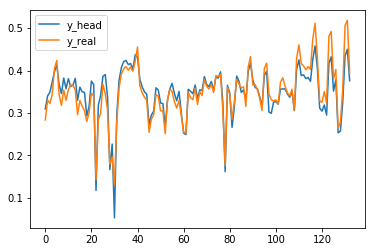

In [23]:
plt.plot(coef[coef.city_id==1].y_head.iloc[0].ravel(),label='y_head')
plt.plot(coef[coef.city_id==1].y_real.iloc[0].ravel(),label='y_real')
plt.legend()

In [7]:
dec = pd.read_csv("/Users/didi/Downloads/enjoy_dec20.csv",low_memory=False).sort_values('call_city')

dec['frate']=dec['finish']/dec['compete_call']
dec['new_tsh_70']=dec['tsh_enjoy']*dec['yzy']/0.7
dec['new_tsh_90']=dec['tsh_enjoy']*dec['yzy']/0.9
dec.head()

,call_city,compete_call,single_call,answer,finish,single_f,gmv,subc,subb,profit,...,iph_enjoy,iph_fast,xt_rate,online_dri,daily_dur,yzy,kzy,frate,new_tsh_70,new_tsh_90
3,1,575774.870968,99977.064516,241757.129032,211546.709677,70613.354839,8.377352e+06,0.043287,0.050449,0.087165,...,52.080874,51.533255,0.051504,15736.548387,9.029263,0.594549,0.197065,0.367412,120684.526814,93865.743077
26,2,95276.354839,19668.548387,38019.967742,32552.225806,13113.387097,1.354576e+06,0.031213,0.018454,0.130804,...,47.284493,42.957938,0.433256,4940.387097,9.037040,0.455065,0.170468,0.341661,29024.371944,22574.511512
5,3,58653.548387,8164.322581,22756.354839,19281.419355,5856.774194,9.708119e+05,0.030745,0.023220,0.112047,...,43.113649,40.944643,0.575947,5062.193548,7.827093,0.426314,0.160565,0.328734,24130.739545,18768.352979
7,4,223674.741935,25061.677419,98883.322581,83469.548387,19015.645161,3.635338e+06,0.021527,0.039376,0.107581,...,58.640034,48.547955,0.288623,8519.935484,8.262624,0.232276,0.140809,0.373174,23359.372843,18168.401100
21,5,124150.870968,21678.677419,36188.096774,30437.806452,13847.419355,1.163637e+06,0.093717,0.032709,0.046565,...,48.440767,42.243948,0.133038,2288.741935,9.914221,0.304501,0.079908,0.245168,9870.671247,7677.188748


In [8]:
dec=pd.merge(dec,coef[['city_id','a1','a2','a3','k','r_square']],left_on='call_city',right_on='city_id',how='left')
dec.head()

,call_city,compete_call,single_call,answer,finish,single_f,gmv,subc,subb,profit,...,kzy,frate,new_tsh_70,new_tsh_90,city_id,a1,a2,a3,k,r_square
0,1,575774.870968,99977.064516,241757.129032,211546.709677,70613.354839,8.377352e+06,0.043287,0.050449,0.087165,...,0.197065,0.367412,120684.526814,93865.743077,1,-0.287309,0.260355,-1.063731,1.131003,0.859742
1,2,95276.354839,19668.548387,38019.967742,32552.225806,13113.387097,1.354576e+06,0.031213,0.018454,0.130804,...,0.170468,0.341661,29024.371944,22574.511512,2,-0.209015,0.181266,-0.440803,0.989373,0.957869
2,3,58653.548387,8164.322581,22756.354839,19281.419355,5856.774194,9.708119e+05,0.030745,0.023220,0.112047,...,0.160565,0.328734,24130.739545,18768.352979,3,-0.197733,0.226955,-0.551314,0.413236,0.952506
3,4,223674.741935,25061.677419,98883.322581,83469.548387,19015.645161,3.635338e+06,0.021527,0.039376,0.107581,...,0.140809,0.373174,23359.372843,18168.401100,4,-0.321155,0.260714,-0.626228,1.587927,0.881523
4,5,124150.870968,21678.677419,36188.096774,30437.806452,13847.419355,1.163637e+06,0.093717,0.032709,0.046565,...,0.079908,0.245168,9870.671247,7677.188748,5,-0.169816,0.172407,-0.136017,0.521694,0.924058


In [9]:
# 成交率~a1*log呼单+a2*log运力+a3*下听比+k
dec['new_frate_70']=dec['a1']*np.log(dec['compete_call'])+dec['a2']*np.log(dec['new_tsh_70'])+dec['a3']*dec['xt_rate']+dec['k']

dec['new_frate_90']=dec['a1']*np.log(dec['compete_call'])+dec['a2']*np.log(dec['new_tsh_90'])+dec['a3']*dec['xt_rate']+dec['k']

In [10]:
dec.to_csv("/Users/didi/Desktop/优享供需系数.csv",index=False)

# 北京

In [182]:
df = pd.read_csv("/Users/didi/Downloads/beijing_hr.csv",low_memory=False,parse_dates=['dt'])
df.head()

,dt,city_id,hr,compete_call,all_call,single_call,grab,grab_after_cancel,grab_after_pas_cancel,grab_after_dri_cancel,finish,all_finish,online_hr,busy_hr,ords,all_ords
0,2020-08-01,1,0,22233,55943,8938,6133,553,499,53,5397,40681,3357.816667,2599.450000,5397,5513
1,2020-08-01,1,1,11877,31593,4978,3612,351,305,45,3166,24773,2186.500000,1568.766667,3166,3201
2,2020-08-01,1,2,8617,22878,3578,2618,231,209,22,2312,18034,1586.316667,1091.300000,2312,2360
3,2020-08-01,1,3,5995,16403,2433,1771,154,136,17,1571,12737,1166.816667,757.750000,1571,1604
4,2020-08-01,1,4,4876,13190,2013,1344,139,123,16,1168,9900,912.316667,582.400000,1168,1204


In [183]:
df['dow']=df['dt'].apply(lambda x:x.weekday())

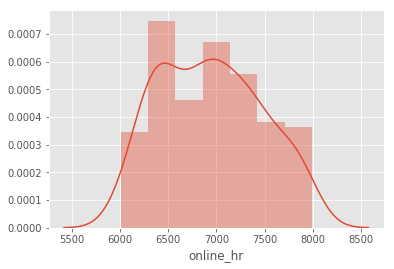

In [210]:
sns.distplot(peak.online_hr)

In [311]:
df['xt_rate']=1-df['ords']/df['all_ords']
df['finish_rate']=df['finish']/df['compete_call']
df['log_call']=np.log(df['compete_call'])
df['log_tsh']=np.log(df['online_hr'])
df['log_tsh_real']=np.log(df['online_hr']*(1-df['xt_rate']))

peak=df[(df.dow.isin([1,2,3,4,5]))&(df.hr.isin([8,9,21,22]))]
#peak=peak[peak.dt>='2020-10-16']
peak=peak[(peak.compete_call<=60000)&(peak.compete_call>=20000)]
peak=peak[(peak.online_hr<=9000)&(peak.online_hr>=5000)]
#peak=peak[(peak.compete_call<=np.percentile(peak.compete_call,90))&(peak.compete_call>=np.percentile(peak.compete_call,10))]
#peak=peak.groupby('dt').sum()

plain=df[(df.dow.isin([1,2,3,4,5]))&(df.hr.isin([11,12,13,14,15,16]))]
#plain=plain.groupby('dt').sum()

print(peak.shape,plain.shape)

(375, 22) (786, 22)


In [289]:
peak.head()

,dt,city_id,hr,compete_call,all_call,single_call,grab,grab_after_cancel,grab_after_pas_cancel,grab_after_dri_cancel,...,online_hr,busy_hr,ords,all_ords,dow,xt_rate,finish_rate,log_call,log_tsh,log_tsh_real
8,2020-08-01,1,8,20315,69850,7859,7883,995,967,24,...,3467.016667,2757.866667,6790,6996,5,0.029445,0.334236,9.919115,8.151050,8.121162
9,2020-08-01,1,9,25864,81818,10181,9779,1220,1186,31,...,4523.933333,3812.916667,8418,8621,5,0.023547,0.325472,10.160607,8.417137,8.393308
21,2020-08-01,1,21,25841,78741,12217,11966,1196,1122,70,...,5766.833333,4506.050000,10595,10733,5,0.012858,0.410007,10.159718,8.659878,8.646937
22,2020-08-01,1,22,24163,72947,11127,10269,977,906,68,...,5236.900000,4068.916667,9145,9303,5,0.016984,0.378471,10.092578,8.563485,8.546355
80,2020-08-04,1,8,47502,184140,8230,10813,1490,1428,59,...,5008.916667,4286.983333,9023,9365,1,0.036519,0.189992,10.768527,8.518975,8.481772


In [313]:
model=LinearRegression()
x=peak[['log_call','log_tsh','xt_rate']]
y=peak['finish_rate']
model.fit(x,y)
print(model.coef_,model.intercept_)
print(model.score(x,y))

[-0.26369073  0.21780293 -0.66138922] 1.175736592385097
0.7595032452877347


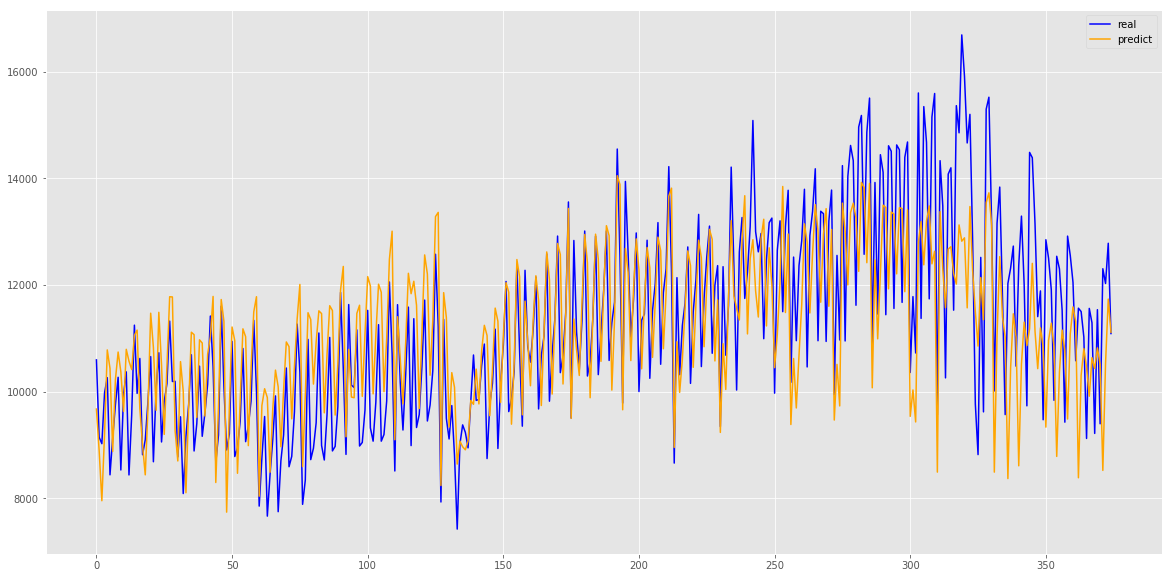

In [314]:
plt.figure(figsize=(20,10))
plt.plot(peak.finish.ravel(),label='real',color='blue')
plt.plot(model.predict(x)*peak['compete_call'].ravel(),label='predict',color='orange')
plt.legend()

In [315]:
temp=model.predict(x)*peak['compete_call'].ravel()-peak.finish.ravel()
np.sqrt(sum([i**2 for i in temp])/len(temp))

1406.6688971528492

In [268]:
peak[peak.dt>='2020-12-01'].groupby('dt').agg({'compete_call':np.mean,'online_hr':np.mean,'finish':np.mean,'xt_rate':np.mean}).mean()

compete_call    44875.314583
online_hr        7345.244931
finish          12557.437500
xt_rate             0.036096
dtype: float64

In [164]:
peak.head()

,dt,city_id,hr,compete_call,all_call,single_call,grab,grab_after_cancel,grab_after_pas_cancel,grab_after_dri_cancel,...,online_hr,busy_hr,ords,all_ords,dow,xt_rate,finish_rate,log_call,log_tsh,log_tsh_real
55,2020-11-03,1,7,30501,121888,3104,9561,1359,1285,74,...,4729.966667,3414.133333,7986,8473,1,0.057477,0.261827,10.325515,8.461673,8.402479
56,2020-11-03,1,8,45246,176598,4625,13208,1899,1805,93,...,6557.400000,5255.733333,11021,11531,1,0.044229,0.243580,10.719870,8.788349,8.743113
57,2020-11-03,1,9,44398,169428,5756,13662,1662,1567,94,...,7440.233333,5747.050000,11727,12226,1,0.040815,0.264134,10.700950,8.914657,8.872987
69,2020-11-03,1,21,45654,172740,9248,14320,1125,931,193,...,8225.950000,5810.383333,12973,13555,1,0.042936,0.284181,10.728847,9.015049,8.971164
70,2020-11-03,1,22,41802,146177,7470,11180,991,808,182,...,7714.100000,5358.183333,10001,10402,1,0.038550,0.239271,10.640699,8.950805,8.911492


In [53]:
exp_finish_rate=[-0.23500915*np.log(41508.4)+0.14221653*np.log(i)-0.11051626*0.036702+1.5380969043941868 for i in range(5000,100000,100)]
#exp_finish=exp_finish_rate*207542

Text(0.5, 1.0, '北京高峰完单vs运力（假设呼单每小时45000）')

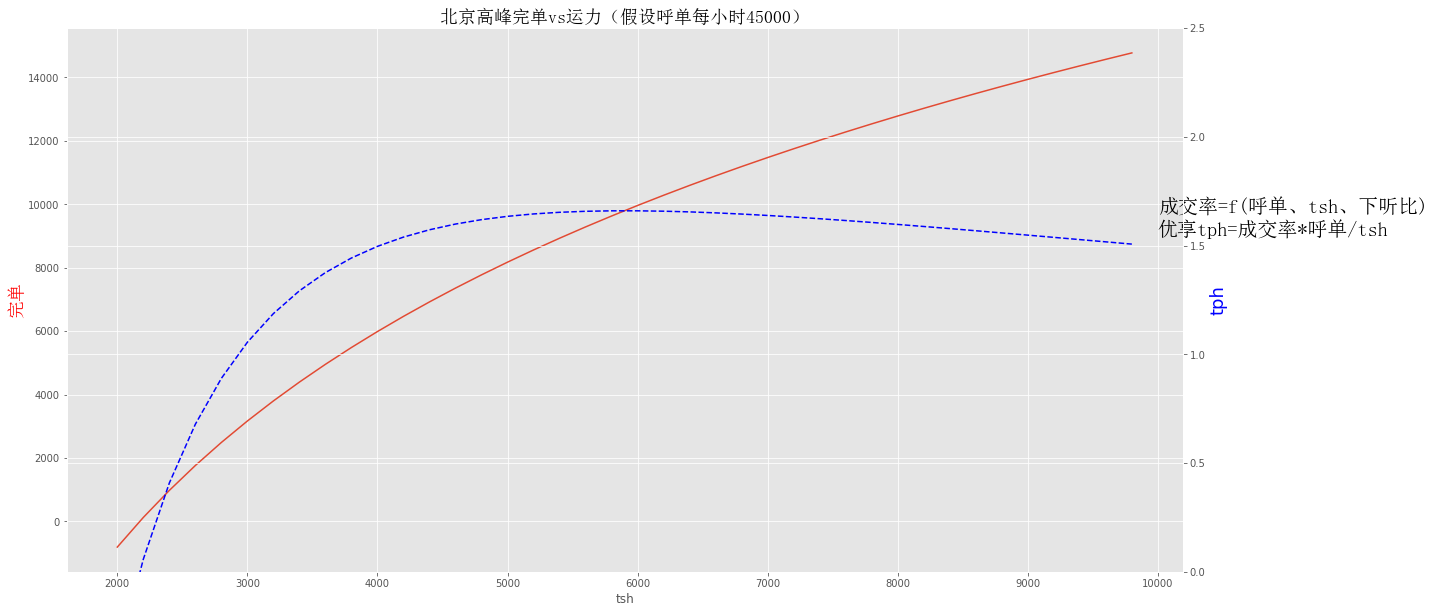

In [310]:
exp_finish_rate=[model.coef_[0]*np.log(45000)+model.coef_[1]*np.log(i)+model.coef_[2]*0.036096+model.intercept_ for i in range(2000,10000,200)]
exp_finish=[i*45000 for i in exp_finish_rate]
exp_tph=pd.Series(exp_finish)/range(2000,10000,200)

fig,ax1=plt.subplots(figsize=(20,10))
ax1.plot(list(range(2000,10000,200)),exp_finish,'-')

#ax1.plot([2500,4000,6000,8000,10000],[1500,6000,10000,12800,15000],'--o')
#plt.plot([0,15000],[0,15000],'--',color='orange')
ax1.set_xlabel('tsh')
#ax1.set_ylim(-1000,)
ax1.set_ylabel('完单',fontproperties=myfont,fontsize=18,color='red')
plt.text(10000,9000,'成交率=f(呼单、tsh、下听比)\n优享tph=成交率*呼单/tsh',fontproperties=myfont,fontsize=20)

ax2 = ax1.twinx() 
ax2.plot(list(range(2000,10000,200)),exp_tph,'--',color='blue')
ax2.set_ylabel('tph',fontsize=18,color='blue')
ax2.set_ylim(0,2.5)

plt.title('北京高峰完单vs运力（假设呼单每小时45000）',fontproperties=myfont,fontsize=18)





In [307]:
(model.coef_[0]*np.log(45000)+model.coef_[1]*np.log(7345)+model.coef_[2]*0.036096+model.intercept_)*45000

11943.140728757131

In [355]:
#peak=df[(df.dow.isin([1,2,3,4,5]))&(df.hr.isin([8,9,21,22]))]
peak=df[(df.dow.isin([1,2,3,4,5]))&(df.hr.isin([11,12,13,14,15,16]))]

#peak=peak[peak.dt>='2020-10-16']
#peak=peak[(peak.compete_call<=60000)&(peak.compete_call>=20000)]
#peak=peak[(peak.online_hr<=9000)&(peak.online_hr>=5000)]
#peak=peak[(peak.compete_call<=np.percentile(peak.compete_call,90))&(peak.compete_call>=np.percentile(peak.compete_call,10))]
peak=peak.groupby('dt').sum()

peak['xt_rate']=1-peak['ords']/peak['all_ords']
peak['finish_rate']=peak['finish']/peak['compete_call']
peak['log_call']=np.log(peak['compete_call'])
peak['log_tsh']=np.log(peak['online_hr'])
peak['log_tsh_real']=np.log(peak['online_hr']*(1-peak['xt_rate']))


print(peak.shape)

(131, 21)


In [356]:
model=LinearRegression()
x=peak[['log_call','log_tsh','xt_rate']]
y=peak['finish_rate']
model.fit(x,y)
print(model.coef_,model.intercept_)
print(model.score(x,y))

[-0.31050438  0.2699634  -0.93439089] 1.2906272699748074
0.8626587502174758


In [357]:
peak=peak.reset_index()
peak[peak.dt>='2020-12-01'].groupby('dt').agg({'compete_call':np.mean,'online_hr':np.mean,'finish':np.mean}).mean()

compete_call    144513.977778
online_hr        35706.011481
finish           58244.800000
dtype: float64

Text(0.5, 1.0, '北京周中高峰完单vs运力')

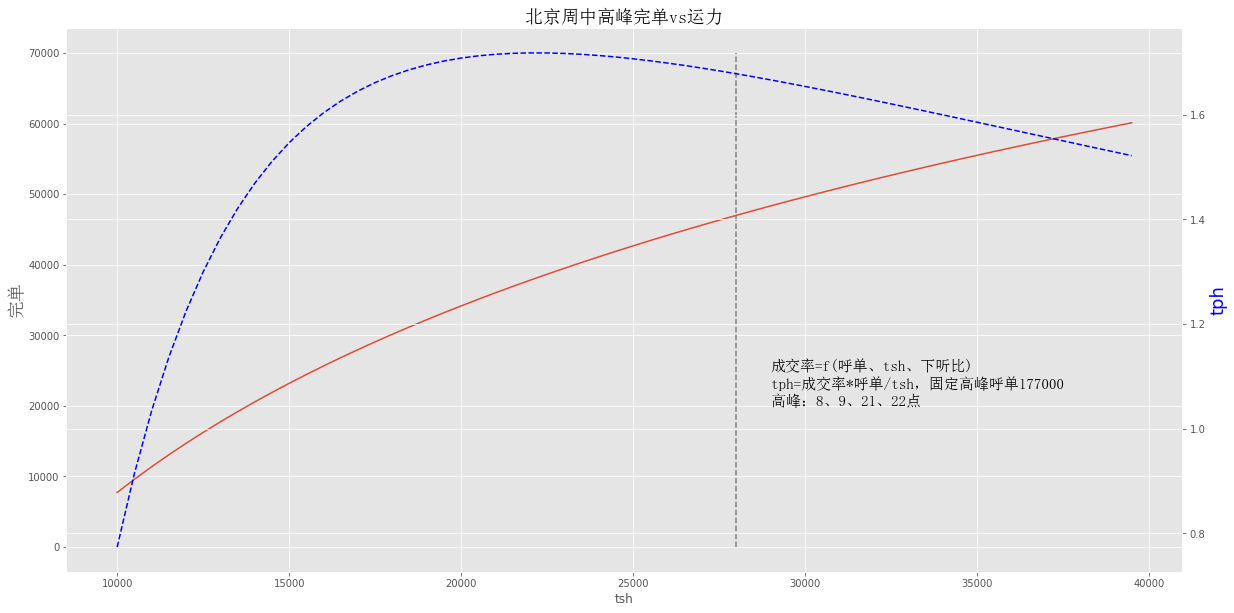

In [354]:
exp_finish_rate=[model.coef_[0]*np.log(176853)+model.coef_[1]*np.log(i)+model.coef_[2]*0.036096+model.intercept_ for i in range(10000,40000,500)]
exp_finish=[i*176853 for i in exp_finish_rate]
exp_tph=pd.Series(exp_finish)/range(10000,40000,500)

fig,ax1=plt.subplots(figsize=(20,10))
ax1.plot(list(range(10000,40000,500)),exp_finish,'-')
ax1.plot([28000,28000],[0,70000],'--',color='gray')

#ax1.plot([2500,4000,6000,8000,10000],[1500,6000,10000,12800,15000],'--o')
#plt.plot([0,15000],[0,15000],'--',color='orange')
ax1.set_xlabel('tsh')
#ax1.set_ylim(-1000,)
ax1.set_ylabel('完单',fontproperties=myfont,fontsize=18)
plt.text(29000,20000,'成交率=f(呼单、tsh、下听比)\ntph=成交率*呼单/tsh，固定高峰呼单177000\n高峰：8、9、21、22点',fontproperties=myfont,fontsize=15)

ax2 = ax1.twinx() 
ax2.plot(list(range(10000,40000,500)),exp_tph,'--',color='blue')
ax2.set_ylabel('tph',fontsize=18,color='blue')
#ax2.set_ylim(0,2.5)

plt.title('北京周中高峰完单vs运力',fontproperties=myfont,fontsize=18)


Text(0.5, 1.0, '北京周中平峰完单vs运力')

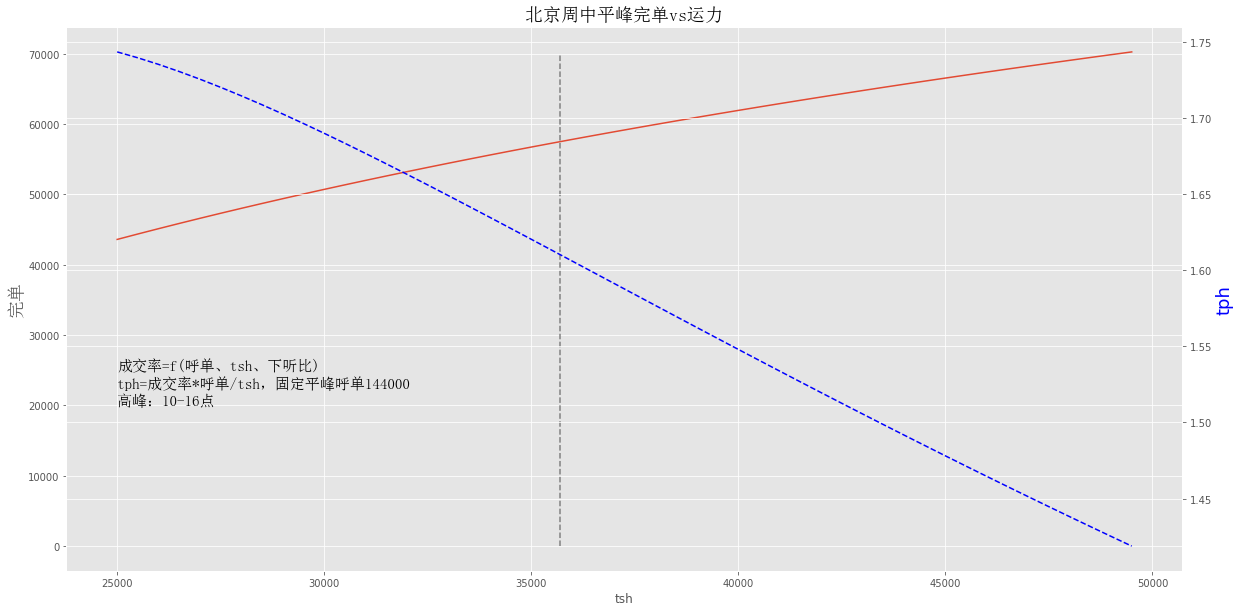

In [363]:
exp_finish_rate=[model.coef_[0]*np.log(144513)+model.coef_[1]*np.log(i)+model.coef_[2]*0.036096+model.intercept_ for i in range(25000,50000,500)]
exp_finish=[i*144513 for i in exp_finish_rate]
exp_tph=pd.Series(exp_finish)/range(25000,50000,500)

fig,ax1=plt.subplots(figsize=(20,10))
ax1.plot(list(range(25000,50000,500)),exp_finish,'-')
ax1.plot([35700,35700],[0,70000],'--',color='gray')

#ax1.plot([2500,4000,6000,8000,10000],[1500,6000,10000,12800,15000],'--o')
#plt.plot([0,15000],[0,15000],'--',color='orange')
ax1.set_xlabel('tsh')
#ax1.set_ylim(-1000,)
ax1.set_ylabel('完单',fontproperties=myfont,fontsize=18)
plt.text(25000,20000,'成交率=f(呼单、tsh、下听比)\ntph=成交率*呼单/tsh，固定平峰呼单144000\n高峰：10-16点',fontproperties=myfont,fontsize=15)

ax2 = ax1.twinx() 
ax2.plot(list(range(25000,50000,500)),exp_tph,'--',color='blue')
ax2.set_ylabel('tph',fontsize=18,color='blue')
#ax2.set_ylim(,2)

plt.title('北京周中平峰完单vs运力',fontproperties=myfont,fontsize=18)

# 北京极速优享

In [317]:
df = pd.read_csv("/Users/didi/Downloads/jisu_youxiang.csv",low_memory=False,parse_dates=['dt'])
xt = pd.read_csv("/Users/didi/Downloads/jisu_xiating.csv",low_memory=False,parse_dates=['dt'])
xy = pd.read_csv("/Users/didi/Downloads/chenxuanyu.csv",low_memory=False,parse_dates=['dt'],encoding='GBK')
xy= xy[xy.product_line=='优享']
df = pd.merge(df,xt,left_on=['dt','hr'],right_on=['dt','d_hr'],how='left')
df = pd.merge(df,xy,left_on=['dt','hr'],right_on=['dt','stat_hour'],how='left')
df.head()

,dt,city_id,hr,compete_call_x,all_call,single_call,other_answer,grab,grab_after_cancel,grab_after_pas_cancel,grab_after_dri_cancel,finish,all_finish,gmv,subsidy_c,all_gmv,all_subsidy_c,profit,all_profit,online_hr,busy_hr,d_hr,f,xiating_f,xiating_dur,stat_hour,product_line,finish_cnt,answer_cnt,keguan_call,compete_call_y,tsh
0,2021-03-01,1,0,16269,45572,996,7560,2963,325,243,82,2450,20932,98875.17,595.7000,957643.59,13610.5703,16571.588157,122920.826023,1730.216667,1273.350000,0.0,2557,78,39.125833,0.0,优享,2509.0,3020.0,9563.0,16759.0,1733.783333
1,2021-03-01,1,1,6535,21629,409,3472,1866,181,142,39,1555,13565,57816.42,207.5100,567788.99,8981.4666,9582.125713,75261.187204,1182.216667,738.200000,1.0,1639,62,29.920833,1.0,优享,1574.0,1877.0,3545.0,6727.0,1185.266667
2,2021-03-01,1,2,3204,12787,247,1657,1246,124,98,26,1082,9188,39559.92,186.4500,354850.93,6432.5631,6223.282020,48118.141846,874.166667,443.333333,2.0,1157,71,28.317222,2.0,优享,1092.0,1251.0,1737.0,3273.0,876.366667
3,2021-03-01,1,3,1964,8173,148,1059,716,79,66,13,620,5970,23964.10,111.9243,235124.69,3981.9655,3759.729473,31272.543626,649.933333,275.100000,3.0,684,59,17.110000,3.0,优享,624.0,718.0,980.0,1996.0,649.933333
4,2021-03-01,1,4,1662,7487,107,854,577,54,45,9,489,5100,20073.09,131.5800,231669.20,3465.5038,3006.900869,27512.477748,540.483333,216.183333,4.0,608,58,21.107222,4.0,优享,496.0,586.0,899.0,1707.0,540.483333


In [305]:
df.columns

Index(['dt', 'city_id', 'hr', 'compete_call_x', 'all_call', 'single_call',
       'other_answer', 'grab', 'grab_after_cancel', 'grab_after_pas_cancel',
       'grab_after_dri_cancel', 'finish', 'all_finish', 'gmv', 'subsidy_c',
       'all_gmv', 'all_subsidy_c', 'profit', 'all_profit', 'online_hr',
       'busy_hr', 'd_hr', 'f', 'xiating_f', 'xiating_dur', 'stat_hour',
       'product_line', 'finish_cnt', 'answer_cnt', 'keguan_call',
       'compete_call_y', 'tsh'],
      dtype='object')

In [318]:
df=df[~df.dt.isin(['2021-05-01','2021-05-02','2021-05-03','2021-05-04','2021-05-05',
                  '2021-04-03','2021-04-04','2021-04-05',
                  '2021-06-12','2021-06-13','2021-06-14',
                  '2021-07-08'])]
df['compete_finish_rate']=df['finish_cnt']/df['compete_call_y']
df['obj_finish_rate']=df['finish_cnt']/(df['keguan_call'])
df['real_tsh']=df['online_hr']-df['xiating_dur']
df['week_day']=df['dt'].apply(lambda x:x.weekday())
df['is_weekend']=df['week_day'].apply(lambda x:1 if x in (5,6) else 0)
df['log_call']=np.log(df.compete_call_y)
df['log_tsh']=np.log(df.online_hr)
df['xg_rate']=df['compete_call_y']/df['online_hr']

In [423]:
df_temp=df[(df.is_weekend==1)&(~df.hr.isin([17,18]))]

In [424]:
df_temp=df_temp[df_temp.dt>='2021-06-01']
sum(df_temp['subsidy_c'])/sum(df_temp['gmv'])

0.04022384996278798

In [137]:
mm=df_temp.agg({'compete_call':np.mean,'compete_finish_rate':np.mean,'obj_finish_rate':np.mean,
                          'online_hr':np.sum,'f':np.sum})

mm['tph']=mm['f']/mm['online_hr']
mm

compete_call           4.410234e+04
compete_finish_rate    2.931846e-01
obj_finish_rate        5.182777e-01
online_hr              3.073191e+06
f                      4.792158e+06
tph                    1.559343e+00
dtype: float64

In [409]:
model_c=LinearRegression()
x=df_temp[['log_call','log_tsh','xg_rate']]
y=df_temp['compete_finish_rate']
model_c.fit(x,y)
print(model_c.coef_,model_c.intercept_)
print(model_c.score(x,y))

[-0.36460866  0.21023354  0.01822718] 2.185176680369768
0.7508282343771051


In [410]:
model_o=LinearRegression()
x=df_temp[['log_call','log_tsh','xg_rate']]
y=df_temp['obj_finish_rate']
model_o.fit(x,y)
print(model_o.coef_,model_o.intercept_)
print(model_o.score(x,y))

[-0.61985361  0.26042044  0.0277121 ] 4.605554818974932
0.7251226825983468


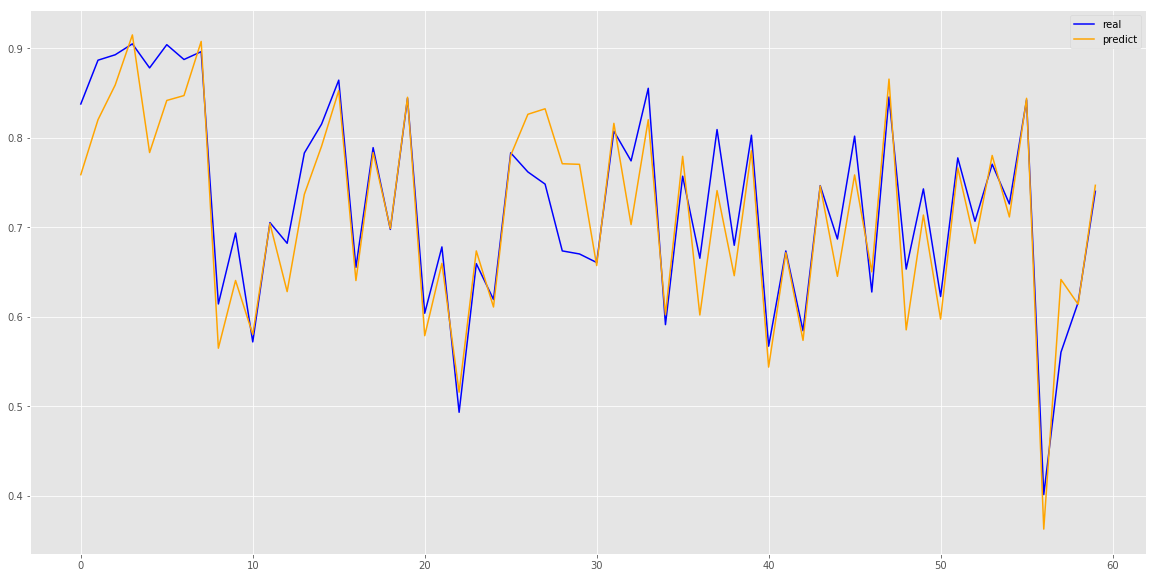

In [372]:
plt.figure(figsize=(20,10))
plt.plot(df_temp.obj_finish_rate.ravel(),label='real',color='blue')
plt.plot(model.predict(df_temp[['log_call','log_tsh']]).ravel(),label='predict',color='orange')
plt.legend()

In [373]:
np.mean(np.abs(df_temp.obj_finish_rate-model_o.predict(x)))

0.029954479781495822

In [374]:
model_o.coef_[0]*np.log(avg_call)+model_o.coef_[1]*np.log(avg_tsh)+model_o.coef_[2]*avg_call/avg_tsh+model_o.intercept_

0.7264369899620293

In [143]:
print(avg_call,avg_tsh)

44102.339887640446 8632.559737827714


In [418]:
from gekko import GEKKO
m = GEKKO(remote=True)

x = m.Var(10000,lb=8000,ub=100000)


avg_call=df_temp.compete_call_x.mean()*1.08
avg_tsh=df_temp[df_temp.dt>='2021-06-01'].online_hr.mean()

m.Minimize(x)
m.Equation((model_o.coef_[0]*np.log(avg_call)+model_o.coef_[1]*m.log(x)+model_o.coef_[2]*avg_call/x+model_o.intercept_)+0.06>=0.7)
#m.Equation((model_o.coef_[0]*np.log(avg_call)+model_o.coef_[1]*m.log(x)+model_o.intercept_)+0.06>=0.6)


m.solve()
print('平均呼单: ',avg_call)
print('最小运力: ',x.value[0]) #运力
x=x.value[0] 
#print('客观成交率: ',0.03+model_o.coef_[0]*np.log(avg_call)+model_o.coef_[1]*np.log(x)+model_o.coef_[2]*avg_call/x+model_o.intercept_) 
print('客观成交率: ',
      0.06+model_o.coef_[0]*np.log(avg_call)+model_o.coef_[1]*np.log(x)+model_o.intercept_) #客观成交率
print('竞争成交率: ',
      (model_c.coef_[0]*np.log(avg_call)+model_c.coef_[1]*np.log(x)+model_o.coef_[2]*avg_call/x+model_c.intercept_)) #竞争成交率
print('高峰tph: ',
      (model_c.coef_[0]*np.log(avg_call)+model_c.coef_[1]*np.log(x)++model_o.coef_[2]*avg_call/x+model_c.intercept_)*avg_call/x) #tph




apm 111.203.187.67_gk_model90 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              2
 Number of total equations: -            1
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

In [406]:
avgg_call=df_temp[df_temp.dt>='2021-06-01'].compete_call_x.mean()*1.1
print(avgg_call/2.5,avgg_call/1.5)

13876.967500000002 23128.27916666667


In [412]:
df[df.is_weekend==0].groupby('hr').agg({'f':np.mean,'tsh':np.mean})

,f,tsh
hr,,
0,4452.090909,4329.094508
1,2563.409091,2952.495644
2,1683.534091,2272.735795
3,1094.965909,1881.726705
4,1011.363636,1730.978030
5,1766.761364,1991.308523
6,5527.261364,3673.796023
7,10784.681818,6329.477083
8,14068.079545,8154.363068


In [238]:
avg_call

51227.4787037037

In [177]:
df_temp[df_temp.dt=='2021-07-01']

,dt,city_id,hr,compete_call,all_call,single_call,other_answer,grab,grab_after_cancel,grab_after_pas_cancel,grab_after_dri_cancel,finish,all_finish,gmv,subsidy_c,all_gmv,all_subsidy_c,profit,all_profit,online_hr,busy_hr,d_hr,f,xiating_f,xiating_dur,compete_finish_rate,obj_finish_rate,real_tsh,week_day,is_weekend,log_call,log_tsh
2936,2021-07-01,1,8,43066,187482,2838,18434,16062,2052,1921,131,13510,126108,497014.19,11354.9203,4594586.14,413485.1788,59380.607658,272439.036279,7827.983333,5192.750000,8.0,14496,928,263.786111,0.313705,0.548474,7564.197222,3,0,10.670489,8.965460
2937,2021-07-01,1,9,46543,190068,3304,21585,15127,1750,1621,129,12968,126355,448544.85,10451.5686,4389397.32,417497.5244,54283.192405,287943.254977,8432.750000,5589.383333,9.0,14015,985,289.411944,0.278624,0.519593,8143.338056,3,0,10.748132,9.039878
2949,2021-07-01,1,21,50973,179332,7648,19557,10734,1198,999,197,9156,93517,485487.97,7214.0848,4420015.66,311410.8993,61322.911561,355368.258116,7249.666667,4207.233333,21.0,10658,810,347.864167,0.179625,0.291444,6901.802500,3,0,10.839051,8.888711
2950,2021-07-01,1,22,45964,155459,5572,18822,9233,988,818,169,7917,80466,415622.21,5939.6905,3917673.88,264541.2055,51672.062664,343980.508458,6945.300000,4076.350000,22.0,9229,679,287.217222,0.172243,0.291688,6658.082778,3,0,10.735614,8.845820
